In [74]:
import pandas as pd
import matplotlib.pyplot as plt

MODEL_SLUG = "DMC-1200m-shortTest-06-12-2023_23:43"

distance = 1200

base_rider = pd.read_csv(f"./data/shortTest-1200m-forced_action_10:8.csv")
model_rider = pd.read_csv(f"./data/shortTest-1200m-{MODEL_SLUG}.csv")

base_rider_name = "10/8 Rider"
model_rider_name = "Model Rider"

In [75]:
print(f"{base_rider_name} time: {base_rider.shape[0]} seconds")
print(f"{model_rider_name} time: {model_rider.shape[0]} seconds")

10/8 Rider time: 149 seconds
Model Rider time: 153 seconds


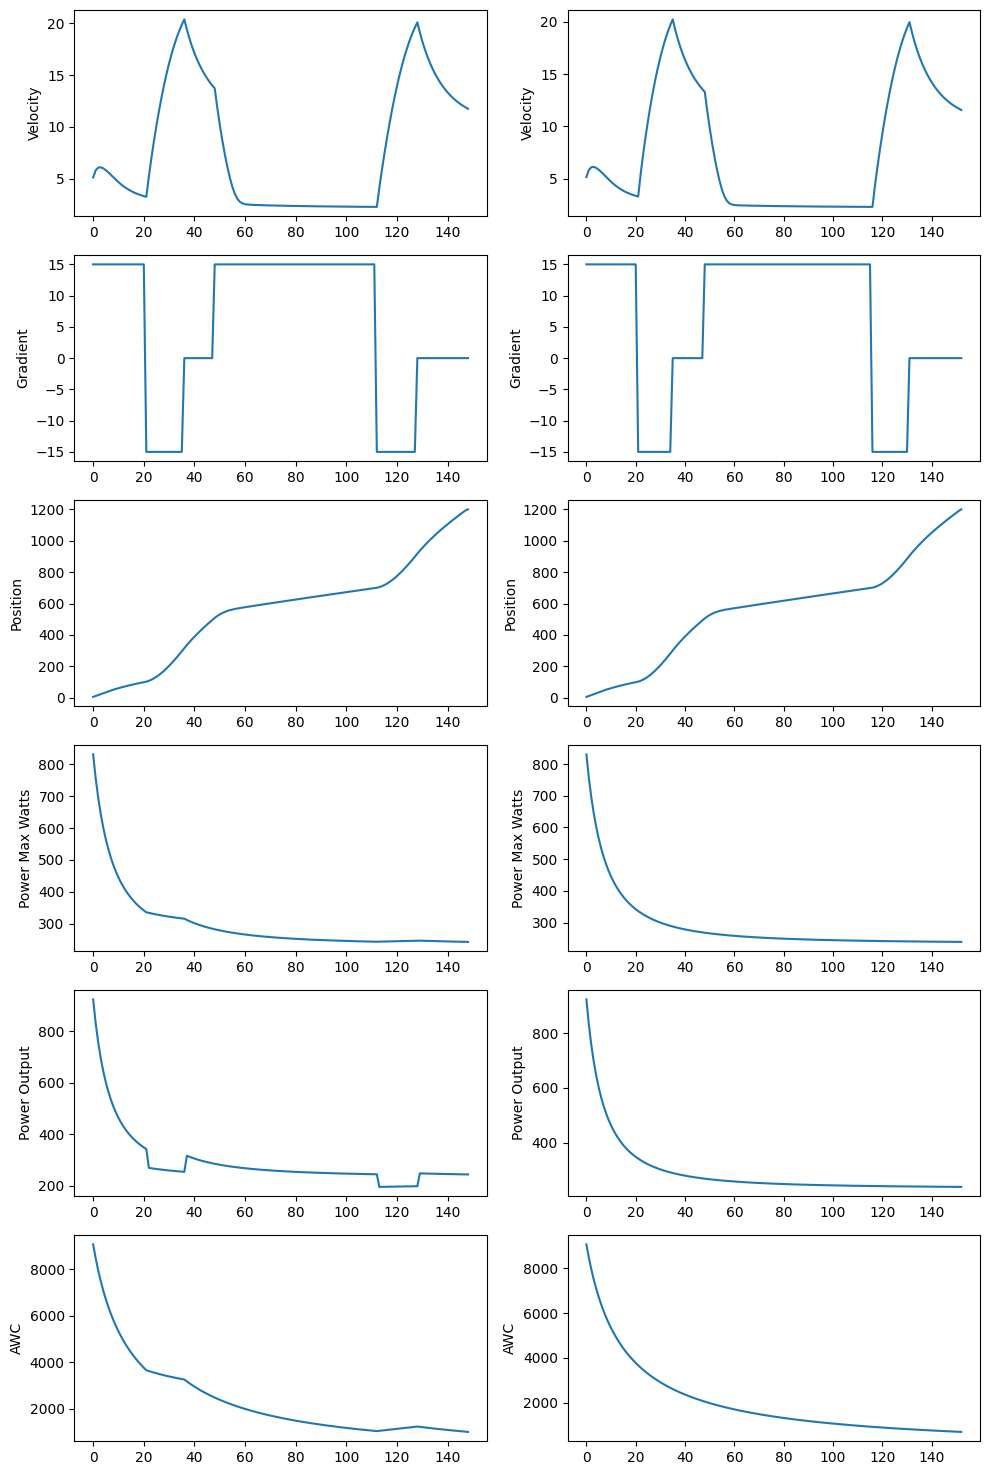

In [76]:
plt.rcParams['figure.figsize'] = [10, 15]

def plots(dfs: list, title: str = None):

    fig, axs = plt.subplots(6, len(dfs))
    fig.suptitle(title)

    if len(dfs) == 1:
        axs = axs.reshape(6, 1)

    for i, df in enumerate(dfs):
        axs[0, i].plot(df.index, df['velocity'])
        axs[0, i].set_ylabel('Velocity')

        axs[1, i].plot(df.index, df['gradient'])
        axs[1, i].set_ylabel('Gradient')

        axs[2, i].plot(df.index, df['position'])
        axs[2, i].set_ylabel('Position')

        axs[3, i].plot(df.index, df['power_max_w'])
        axs[3, i].set_ylabel('Power Max Watts')

        axs[4, i].plot(df.index, df['power_agent_w'])
        axs[4, i].set_ylabel('Power Output')

        axs[5, i].plot(df.index, df['AWC'])
        axs[5, i].set_ylabel('AWC')

    plt.tight_layout()
    plt.show()

plots([base_rider, model_rider])